## Assignment 2: Working with data

Let's work through an example of a time series of average monthly temperatures for four cities from 1950 to the present. Data can be found at https://www.ncdc.noaa.gov/cag/city/time-series/

To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*. Time series for several cities can be combined into a single dataset using Python or Excel.

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

from IPython.display import Image, display

# datadir = 'data/'
# imagesdir = 'images/'
renderer = 'notebook'

datadir = '/content/drive/MyDrive/DataVis/assigment2/data/'
imagesdir = '/content/drive/MyDrive/DataVis/assigment2/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# read the dataset
filename = datadir + 'cityTempsSeries.csv'
df = pd.read_csv(filename)
df

,Date,Cleveland,Miami,NYC,SF
0,195001,35.0,73.6,41.0,44.0
1,195002,27.7,70.5,30.8,49.0
2,195003,31.5,72.2,35.8,50.6
3,195004,41.6,71.4,48.1,54.3
4,195005,59.7,79.5,58.5,55.7
...,...,...,...,...,...
861,202110,61.6,81.2,62.0,62.7
862,202111,41.8,73.1,46.3,58.6
863,202112,40.5,74.5,43.8,50.2
864,202201,23.8,68.7,30.3,52.6


The *date* column has format *yyyymm* and there is one column per city. Temperatures are given in Farenheit.

In [ ]:
df.columns

Index(['Date', 'Cleveland', 'Miami', 'NYC', 'SF'], dtype='object')

What are the attributes?
+ *dates*: ordinal
+ *cities*: categorical (unordered)
+ *temperature values*: numerical

We can extract the columns by name.

In [ ]:
print(df['Date'])
print(df.Miami)

0      195001
1      195002
2      195003
3      195004
4      195005
        ...  
861    202110
862    202111
863    202112
864    202201
865    202202
Name: Date, Length: 866, dtype: int64
0      73.6
1      70.5
2      72.2
3      71.4
4      79.5
       ... 
861    81.2
862    73.1
863    74.5
864    68.7
865    73.5
Name: Miami, Length: 866, dtype: float64


Note the *Date* column is of type integer. Let's convert this column to a Python *datetime* object.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df

,Date,Cleveland,Miami,NYC,SF
0,1950-01-01,35.0,73.6,41.0,44.0
1,1950-02-01,27.7,70.5,30.8,49.0
2,1950-03-01,31.5,72.2,35.8,50.6
3,1950-04-01,41.6,71.4,48.1,54.3
4,1950-05-01,59.7,79.5,58.5,55.7
...,...,...,...,...,...
861,2021-10-01,61.6,81.2,62.0,62.7
862,2021-11-01,41.8,73.1,46.3,58.6
863,2021-12-01,40.5,74.5,43.8,50.2
864,2022-01-01,23.8,68.7,30.3,52.6


Let's extract the month and year from the datetime object and add these as new columns. We'll represent the year as an integer and the month as a month name abbreviation.

In [ ]:
d = df['Date'][1]
print(d)
print(d.month)
print(d.year)

1950-02-01 00:00:00
2
1950


In [ ]:
# get month name abbreviations
import calendar

for i in range(1, 13):
  print(calendar.month_abbr[i])

Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


In [ ]:
# add new columns to frame
df['Year'] = df['Date'].apply(lambda date: date.year)
df['Month'] = df['Date'].apply(lambda date: calendar.month_abbr[date.month])
df

,Date,Cleveland,Miami,NYC,SF,Year,Month
0,1950-01-01,35.0,73.6,41.0,44.0,1950,Jan
1,1950-02-01,27.7,70.5,30.8,49.0,1950,Feb
2,1950-03-01,31.5,72.2,35.8,50.6,1950,Mar
3,1950-04-01,41.6,71.4,48.1,54.3,1950,Apr
4,1950-05-01,59.7,79.5,58.5,55.7,1950,May
...,...,...,...,...,...,...,...
861,2021-10-01,61.6,81.2,62.0,62.7,2021,Oct
862,2021-11-01,41.8,73.1,46.3,58.6,2021,Nov
863,2021-12-01,40.5,74.5,43.8,50.2,2021,Dec
864,2022-01-01,23.8,68.7,30.3,52.6,2022,Jan


Let's reorder the columns and drop the *Date* column.

In [ ]:
cols = list(df.columns)
cols

['Date', 'Cleveland', 'Miami', 'NYC', 'SF', 'Year', 'Month']

In [ ]:
newcols = cols[-2:] + cols[1:-2]
newcols

['Year', 'Month', 'Cleveland', 'Miami', 'NYC', 'SF']

In [ ]:
df = df[newcols]
df

,Year,Month,Cleveland,Miami,NYC,SF
0,1950,Jan,35.0,73.6,41.0,44.0
1,1950,Feb,27.7,70.5,30.8,49.0
2,1950,Mar,31.5,72.2,35.8,50.6
3,1950,Apr,41.6,71.4,48.1,54.3
4,1950,May,59.7,79.5,58.5,55.7
...,...,...,...,...,...,...
861,2021,Oct,61.6,81.2,62.0,62.7
862,2021,Nov,41.8,73.1,46.3,58.6
863,2021,Dec,40.5,74.5,43.8,50.2
864,2022,Jan,23.8,68.7,30.3,52.6


What are the attributes?
+ *Year*: ordinal
+ *Month*: ordinal
+ *cities*: categorical (unordered)
+ *temperature values*: numerical



Let's make another dataframe with the same data as `df` but a different format. We *unpivot* `df` so that our new dataframe `df2` has a 'city' column with city name. For each record in `df`, there is one record in `df2` for every city. Dataframe `df2` consists of these fields: year, month, city, and temperature. In pandas, we unpivot using `melt`.

In [ ]:
cities = list(df.columns[2:])
dfu = pd.melt(df,  id_vars=['Year', 'Month'], value_vars=cities, var_name='city', value_name='temp')

In [ ]:
print(df.head(5), '\n\n', dfu.head(5))

   Year Month  Cleveland  Miami   NYC    SF
0  1950   Jan       35.0   73.6  41.0  44.0
1  1950   Feb       27.7   70.5  30.8  49.0
2  1950   Mar       31.5   72.2  35.8  50.6
3  1950   Apr       41.6   71.4  48.1  54.3
4  1950   May       59.7   79.5  58.5  55.7 

    Year Month       city  temp
0  1950   Jan  Cleveland  35.0
1  1950   Feb  Cleveland  27.7
2  1950   Mar  Cleveland  31.5
3  1950   Apr  Cleveland  41.6
4  1950   May  Cleveland  59.7


In [ ]:
print(dfu[(dfu.Year == 1950) & (dfu.Month == 'Jan')])

      Year Month       city  temp
0     1950   Jan  Cleveland  35.0
866   1950   Jan      Miami  73.6
1732  1950   Jan        NYC  41.0
2598  1950   Jan         SF  44.0


For the exercises that follow, you may use either `df` or `dfu`, whichever you find more convenient. When you write a function that inputs an *unpivoted* dataframe like `df2`, append 'U' to the function name.

### Exercise 1
Go to https://www.ncdc.noaa.gov/cag/city/time-series/ and retrieve time-series temperature data for four to six cities of your choice. To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*.

Use Excel to combine these datasets into a single file *cityTempsSeries.csv* with temperature data for your cities. This has the same format as the file read at the top of this notebook, but it has data for your chosen cities.

Then use the techniques used in this notebook above to create a dataframe with the format given above.


In [26]:
# read the dataset
filename2 = datadir + 'combinedata.csv'
df = pd.read_csv(filename2)
df.columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
d = df['Date'][1]
print(d)
# add new columns to frame
df['Year'] = df['Date'].apply(lambda date: date.year)
df['Month'] = df['Date'].apply(lambda date: calendar.month_abbr[date.month])
#printing all new columns
cols = list(df.columns)
cols
## reordering the columns order
newcols = cols[-2:] + cols[1:-2]
df = df[newcols]

# adjusting format
cities = list(df.columns[2:])
dfu = pd.melt(df,  id_vars=['Year', 'Month'], value_vars=cities, var_name='city', value_name='temp')
# printing to see the change
print(df.head(5), '\n\n', dfu.head(5))

1960-02-01 00:00:00
   Year Month  Detroit  San Diego  Colorado Springs  Kahului  Miami    SF
0  1960   Jan     28.4       52.4              28.1     71.9   67.4  48.5
1  1960   Feb     28.1       54.4              23.2     71.5   68.3  51.2
2  1960   Mar     26.2       58.0              37.1     72.4   68.3  54.6
3  1960   Apr     50.3       60.9              50.0     74.1   75.2  55.8
4  1960   May     58.2       62.8              56.1     76.6   77.9  56.5 

    Year Month     city  temp
0  1960   Jan  Detroit  28.4
1  1960   Feb  Detroit  28.1
2  1960   Mar  Detroit  26.2
3  1960   Apr  Detroit  50.3
4  1960   May  Detroit  58.2


### Exercise 2
Let's make a line graph of months by temperature for a given year across all cities. Since months are ordinal, it makes sense to connect successive datapoints with lines.

In [28]:
cities = list(df.columns[2:])
# print(cities)
months = calendar.month_abbr[1:13]
# print(months)
year = 2020
# extract subframe of interest
df2 = df[df.Year == year]
# print(df)
fig = px.line(df2, x=months, y=cities)
fig.update_layout(title_text=year, title_x=0.5, legend_title_text='City')
fig.update_layout(xaxis_title_text='month', yaxis_title_text='temperature (F)')
fig.show()



# #another way
# # Create a new DataFrame to format the data for plotting
# df2_long = df2.melt(id_vars=['Month'], value_vars=cities, var_name='City', value_name='Temperature')
# # Plot using Plotly Express
# fig = px.line(df2_long, x='Month', y='Temperature', color='City', labels={'Month': 'Month', 'Temperature': 'Temperature (F)'})
# # Show the figure
# fig.show()


In [33]:
# we bundle the previous code chunk as a function
def plot_one_year(df, year, cities=None):
  if cities:
    df = df[['Year', 'Month'] + cities]
  else:
    cities = list(df.columns[2:])
  months = calendar.month_abbr[1:13]
  df2 = df[df.Year == year]
  fig = px.line(df2, x=months, y=cities)
  fig.update_layout(title_text=year, title_x=0.5, legend_title_text='cities')
  fig.update_layout(xaxis_title_text='month', yaxis_title_text='temperature (F)')
  return fig

plot_one_year(df, 2010).show()
plot_one_year(df, 2000, ['Kahului', 'Miami']).show()


def plot_one_month(df, month, cities=None):
  if cities:
    df = df[['Year', 'Month'] + cities]
  else:
    cities = list(df.columns[2:])
  df3 = df[df.Month == month]
  years = df3['Year'].unique()
  years.sort()
  fig = px.line(df3, x=years, y=cities)
  fig.update_layout(title_text=f'{month}', title_x=0.5, legend_title_text='cities')
  fig.update_layout(xaxis_title_text='year', yaxis_title_text='temperature (F)')
  return fig




plot_one_month(df, 'Jan', ['San Diego', 'Miami', 'SF']).show()

For this exercise, define the function

    plot_one_month(frame, month, cities)
    
that draws a line graph over all years for given *month* and list of *cities*. Assume *frame* has one of the two formats (`df` or `df2`) defined above, though for this exercise you might find it easier to assume the `df` format.

The following image results from the function call:

    plot_one_month(frame, 'Jan', ['Cleveland', 'Miami', 'NYC']).show()

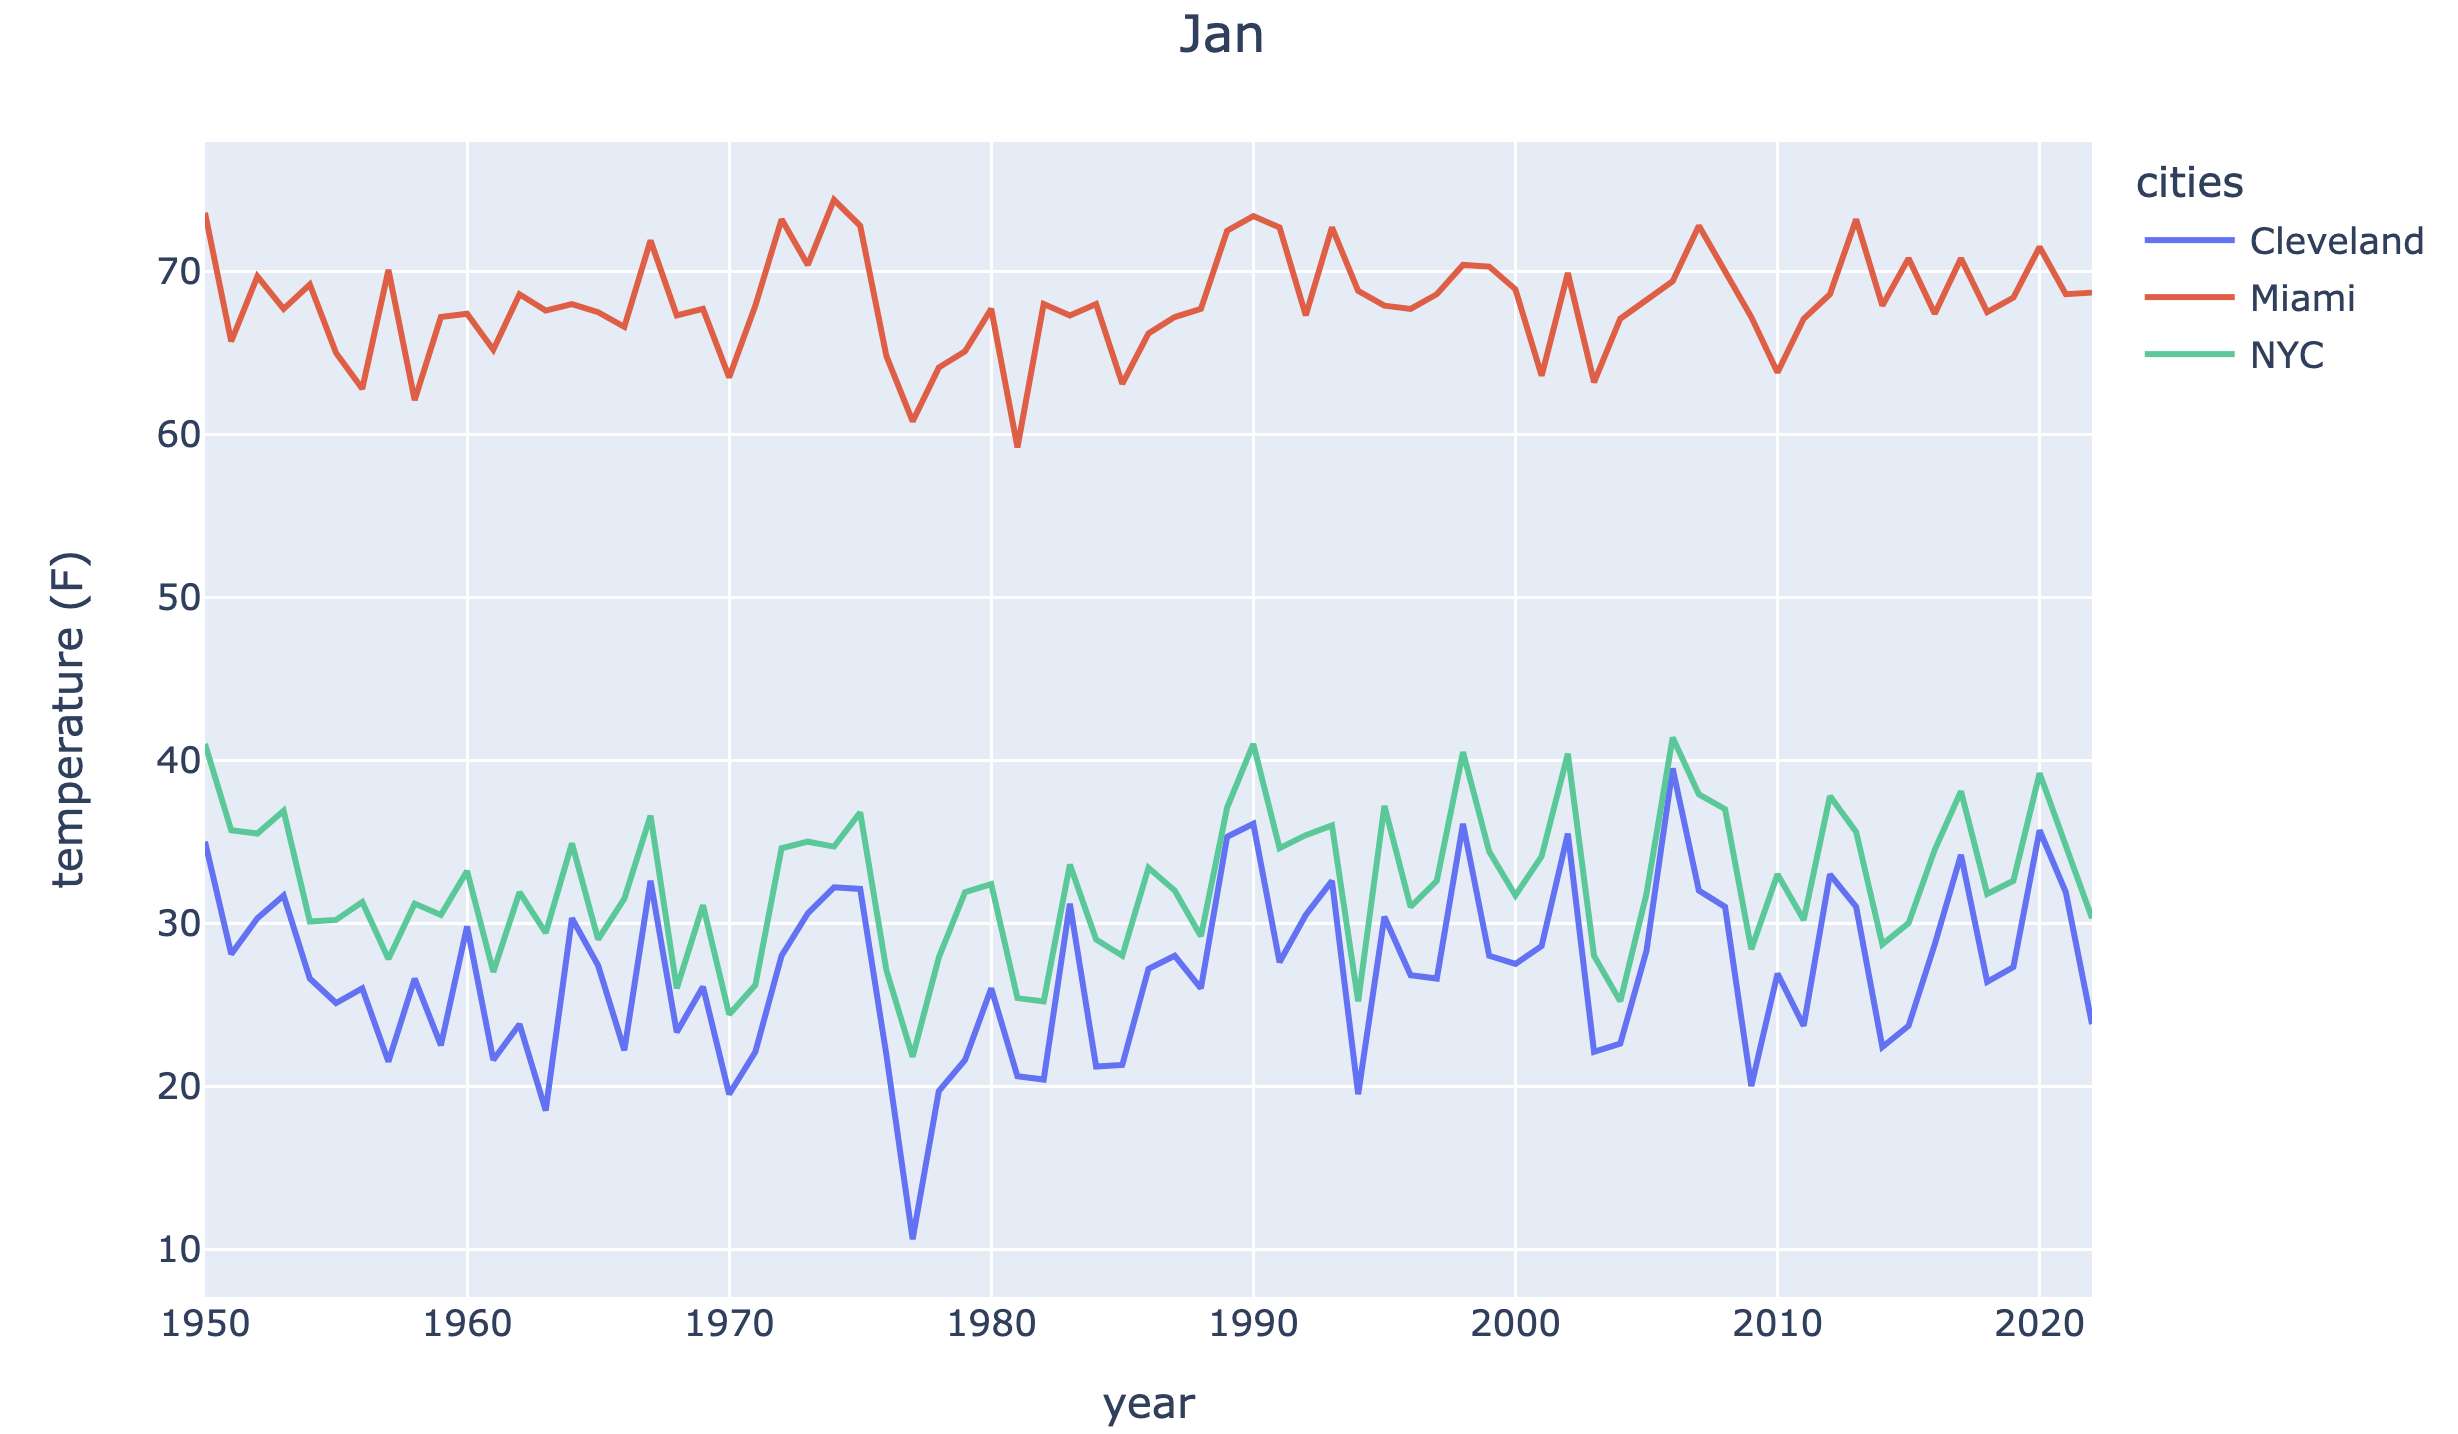

In [ ]:
display_images(['ass2_ex2.png'])

### Exercise 3
We can use a bar graph to show the temperature for a given month and year for each city.

In [34]:
def barplot_year_month(df, year, month):
  cities = list(df.columns[2:])
  rcd = df[(df.Year == year) & (df.Month == month)][cities]
  df = pd.DataFrame({'cities': cities, 'temps': rcd.values[0]})
  fig = px.bar(df, x='cities', y='temps')
  title = str(month) + ' ' + str(year)
  fig.update_layout(title_text=title, title_x=0.5, legend_title_text='cities')
  return fig

barplot_year_month(df, 1980, 'Jan')

## my version= in the comments we can see the important change is ascending= false.
def barplot_year_month(df, year, month):
    cities = list(df.columns[2:])
    rcd = df[(df['Year'] == year) & (df['Month'] == month)][cities]
    # Create a DataFrame with city temperatures
    df_temp = pd.DataFrame({'cities': cities, 'temps': rcd.values[0]})
    # Sort the DataFrame by temperature in descending order
    df_temp = df_temp.sort_values(by='temps', ascending=False)
    # Generate the bar plot
    fig = px.bar(df_temp, x='cities', y='temps')
    title = str(month) + ' ' + str(year)
    fig.update_layout(title_text=title, title_x=0.5, legend_title_text='Cities')
    fig.update_layout(xaxis_title_text='Cities', yaxis_title_text='Temperature (F)')
    return fig


barplot_year_month(df, 1980, 'Jan')



For this excercise, write a version of function `barplot_year_month` that generates a bar graph whose bars are ordered by descending height (from warmest to coldest).

    barplot_year_month(frame, 1980, 'Jan')

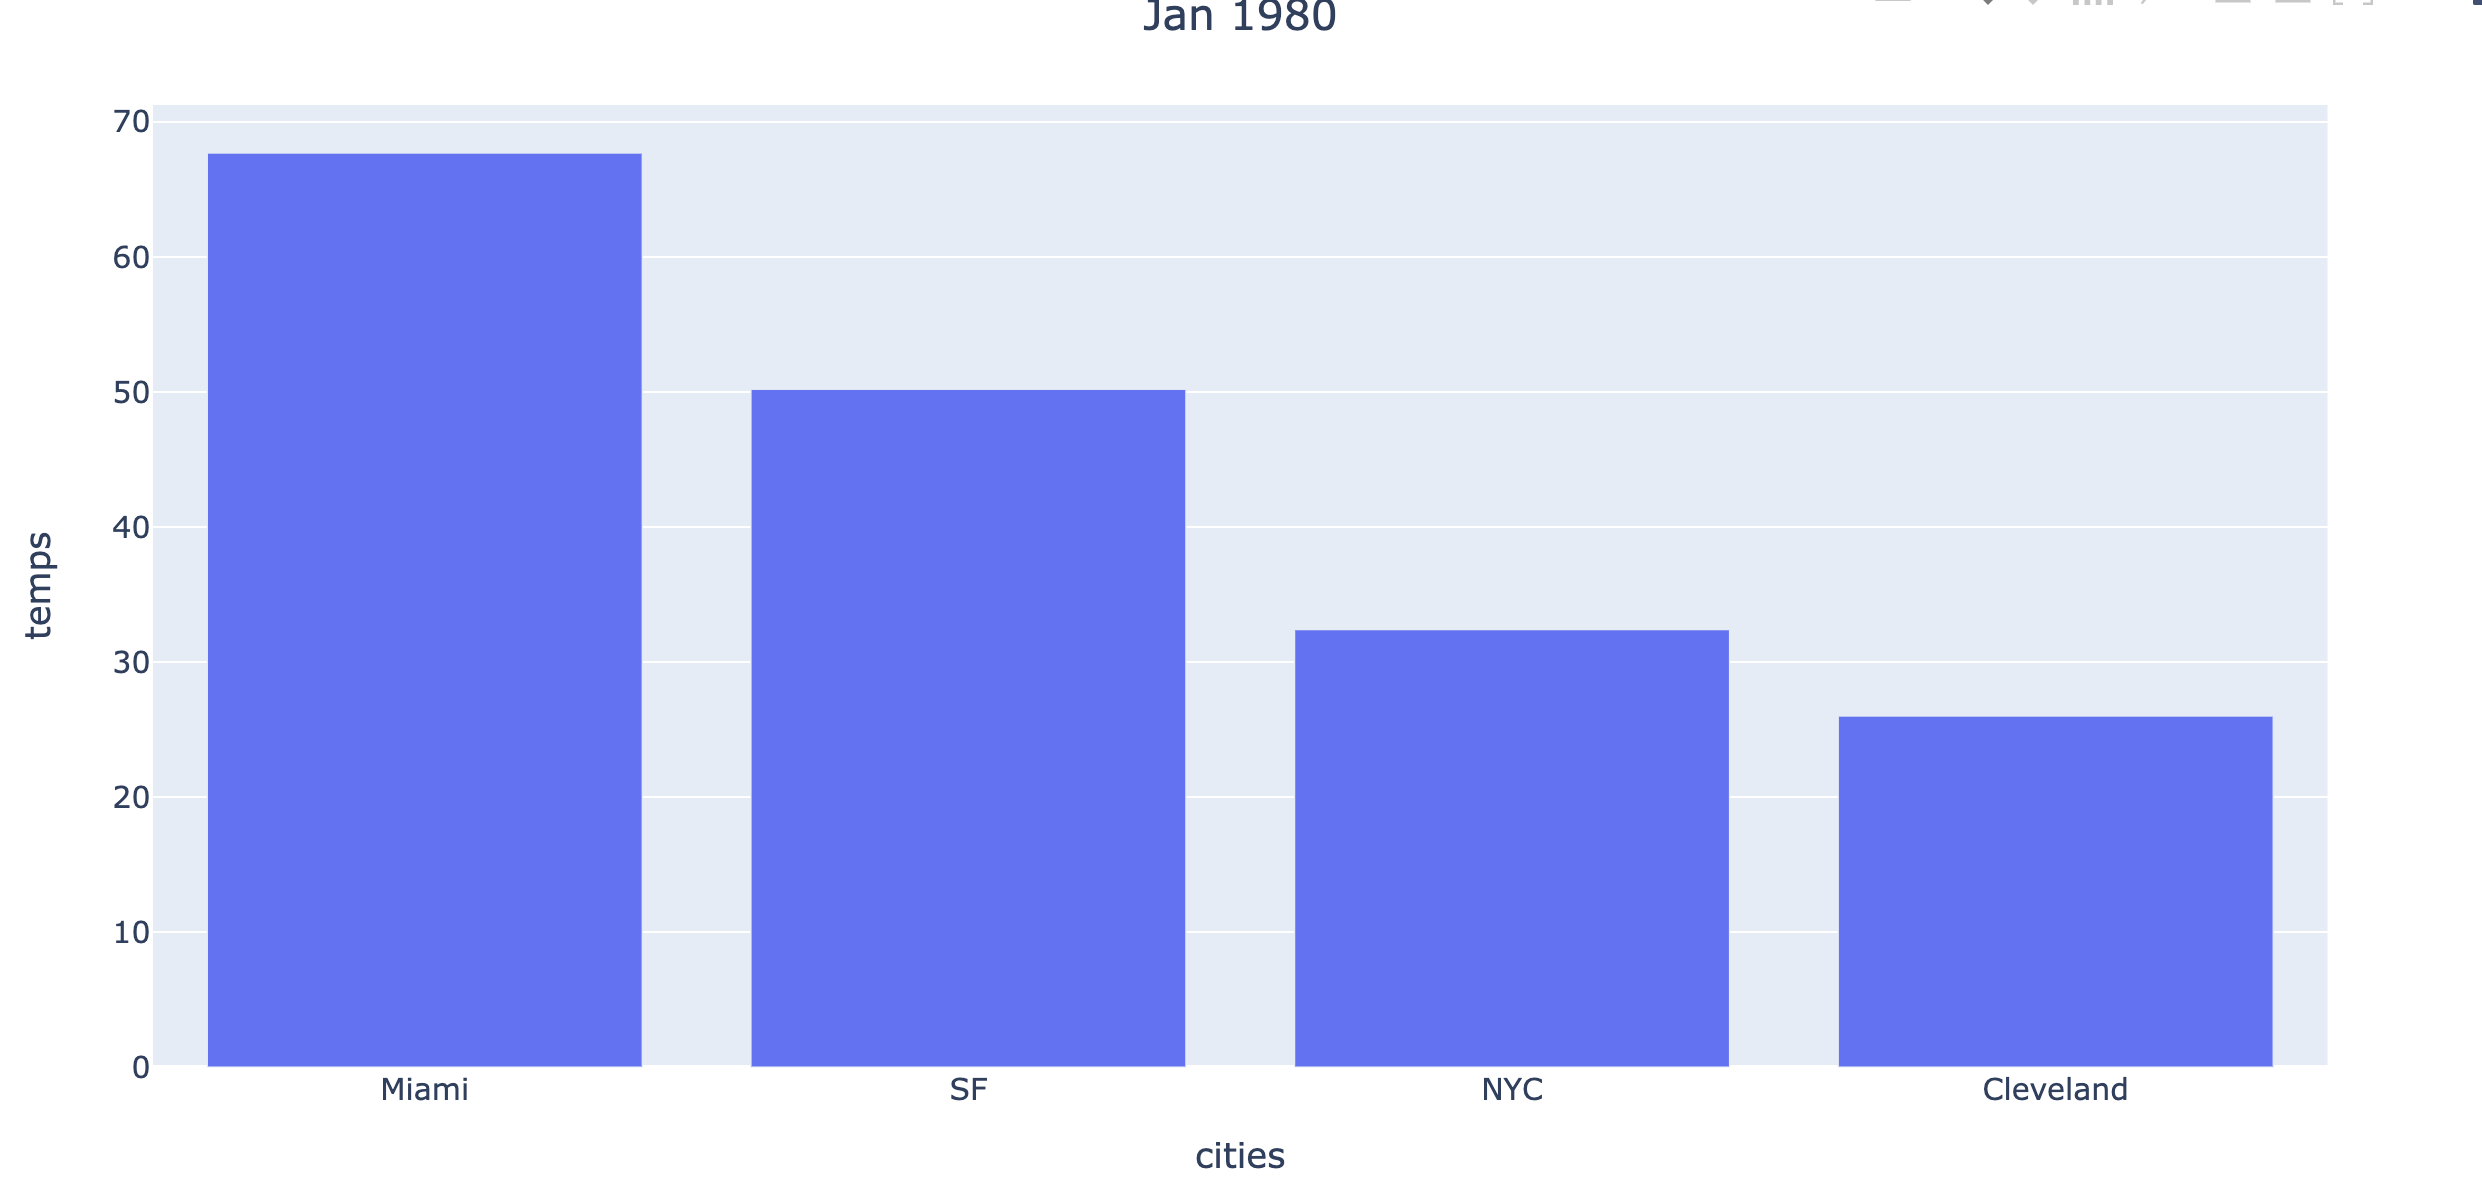

In [ ]:
display_images(['ass2_ex3.png'])

### Exercise 4
Since the cities are unordered categorical data, we can show their temperatures using a dot plot. Each city's temperature values for a given year are depicted by a column of dots arranged along the vertical temperature axis. Write the function `dotplot_one_year(frame, year)` that returns the figure for such a plot.

For example, the following plot is produced by this call:

    dotplot_one_year(frame, 2012)

Hint: For this exercise, you might find it easier to work with `df2` and write `dotplot_one_year2(frame, year)`, although either dataframe format can be used.

In [44]:
def dotplot_one_year2(df, year):
    # Filter the DataFrame for the specified year
    df_year = df[df['Year'] == year]
    # Create the dot plot using Plotly Express
    fig = px.strip(df_year, x='City', y='Temperature', color='City', hover_data=['Month'])
    # Update the layout for better visualization
    fig.update_layout(title_text=f'Temperatures for Cities in {year}', title_x=0.5)
    fig.update_layout(xaxis_title_text='City', yaxis_title_text='Temperature (F)')
    return fig



def dotplot_one_year(df, year):
    # Filter the DataFrame for the specified year
    df_year = df[df['Year'] == year]
    # Reshape the DataFrame to a long format
    cities = list(df.columns[2:])
    df_long = df_year.melt(id_vars=['Year', 'Month'], value_vars=cities, var_name='City', value_name='Temperature')
    # Create the dot plot using Plotly Express
    fig = px.scatter(df_long, x='City', y='Temperature', color='City', hover_data=['Month'])
    #fig = px.strip(df_long, x='City', y='Temperature', color='City', stripmode='overlay', hover_data=['Month'] )
    fig.update_traces(marker=dict(size=25, opacity =0.5))
    # Update the layout for better visualization
    fig.update_layout(title_text=f'{year}', title_x=0.5)
    fig.update_layout(xaxis_title_text='Cities', yaxis_title_text='Temperature (F)',showlegend=False)

    return fig


dotplot_one_year(df, 2012)

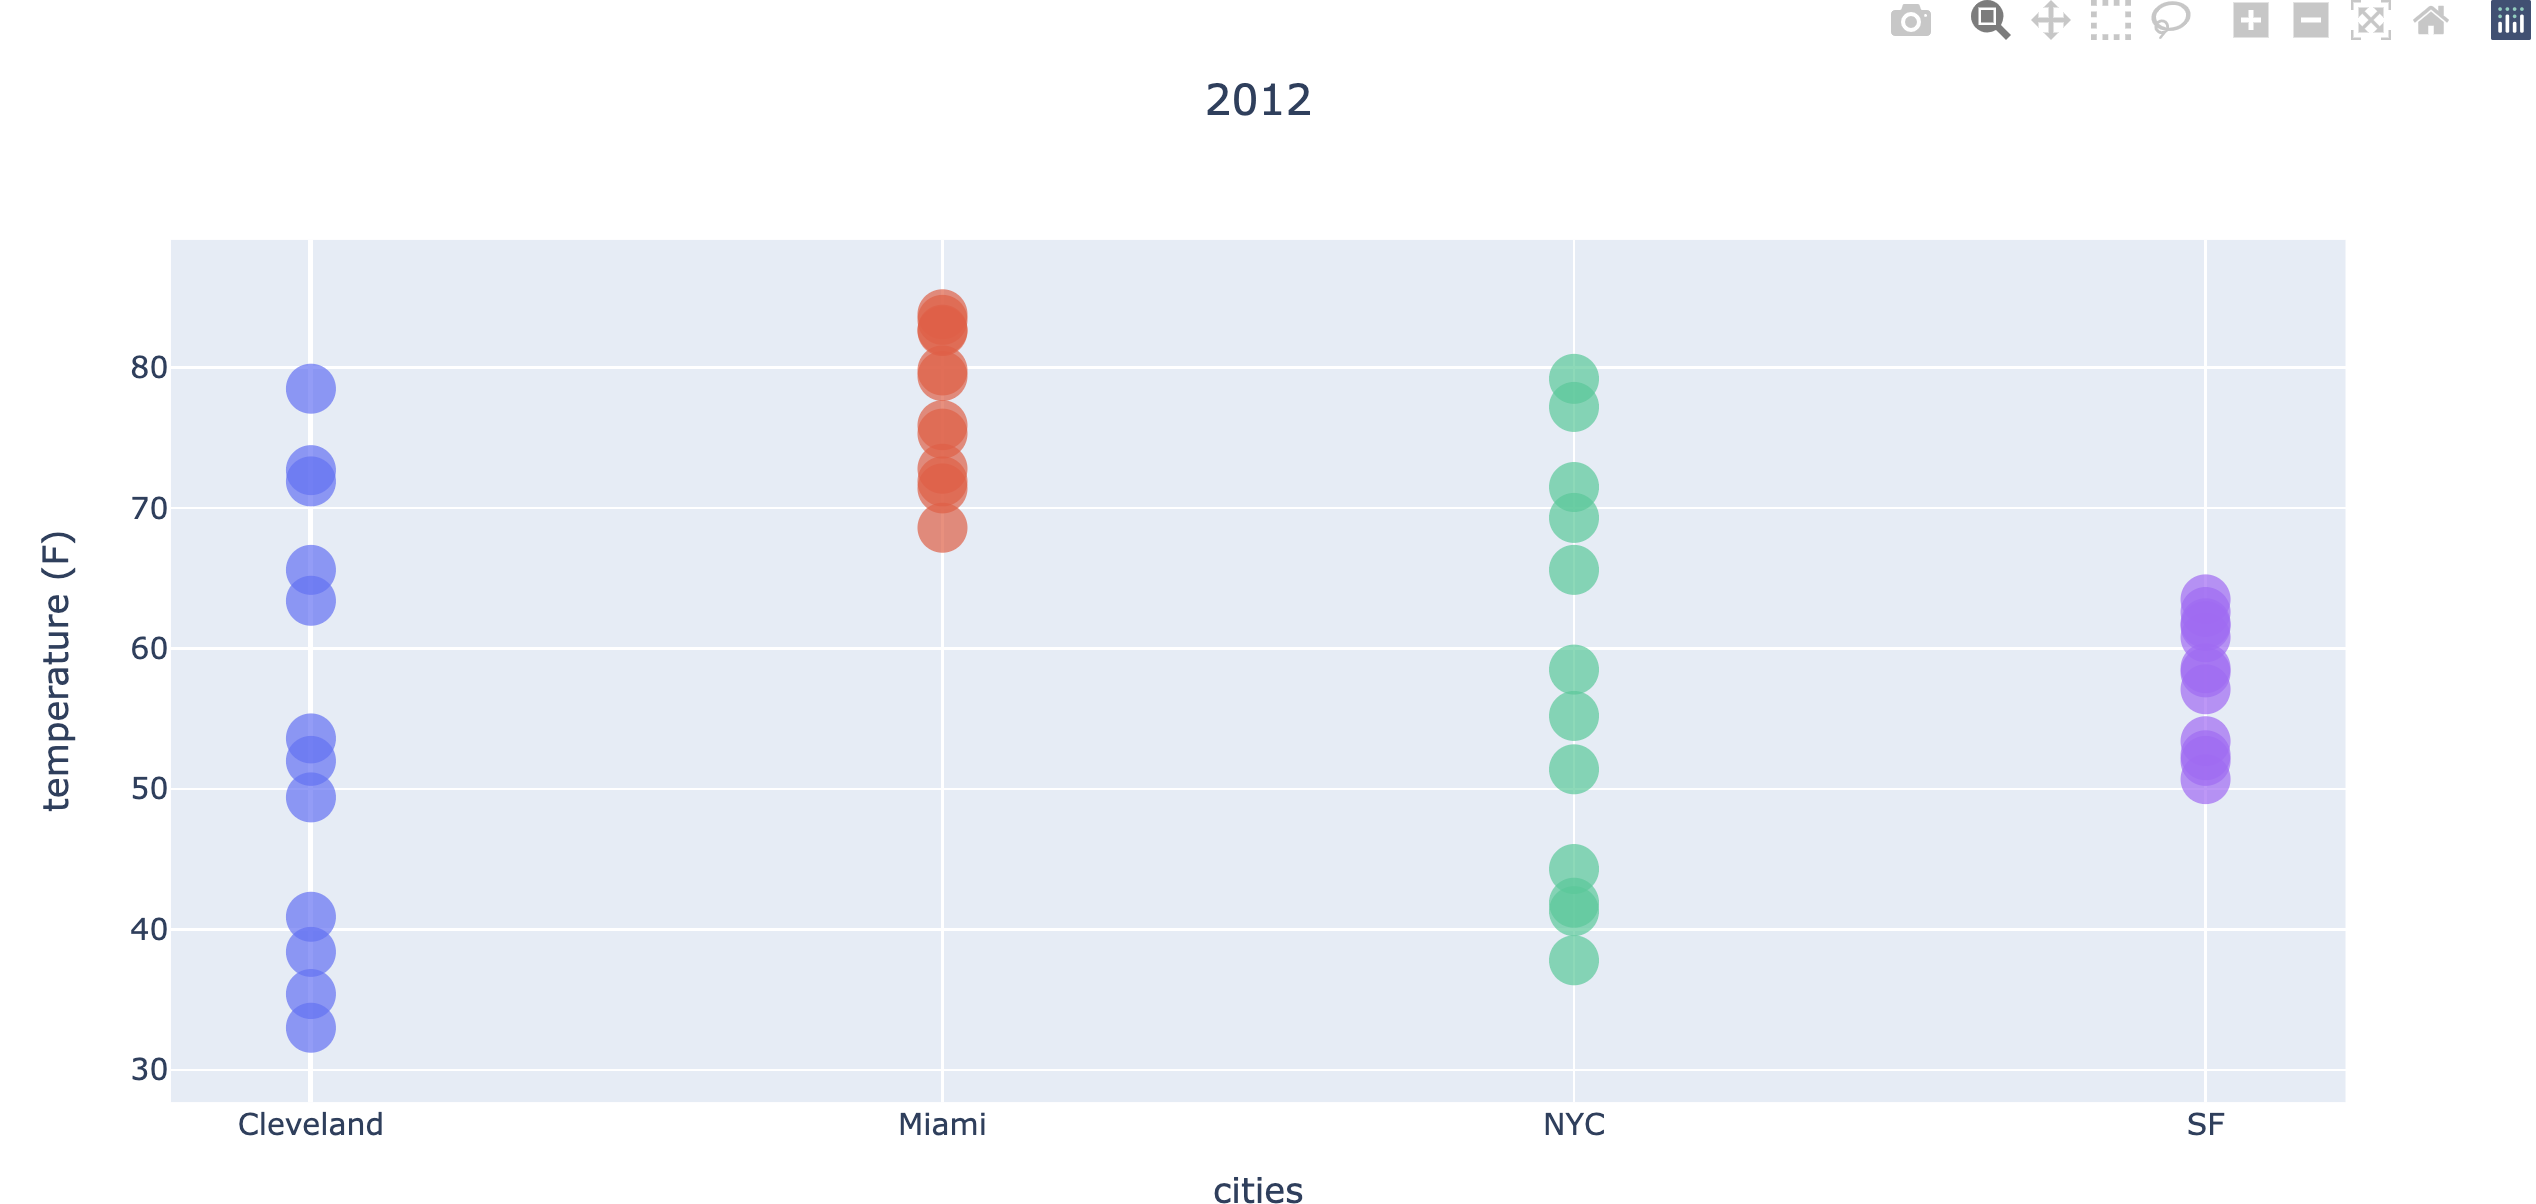

In [ ]:
display_images(['ass2_ex4.png'])

### Exercise 5
We can also use a scatterplot to show variation in temperature in a given month over the range of years, by city. Write the function `scatterplot_one_month(df, month)` that generates a scatterplot for each city on the same plot, which includes a best-fit line for each city.

Hint: Work with the `df2` dataframe format. Name your function `scatterplot_one_month2` to indicate this choice of format.

In [47]:
def scatterplot_one_month(df, month):
    # Filter the DataFrame for the selected month
    df_month = df[df['Month'] == month]
    # Reshape the DataFrame to a long format
    cities = list(df.columns[2:])
    #long dataset
    df_long = df_month.melt(id_vars=['Year', 'Month'], value_vars=cities, var_name='City', value_name='Temperature')
    # Create the scatter plot using Plotly Express
    fig = px.scatter(df_long, x='Year', y='Temperature', color='City', trendline='ols', hover_data=['City'])
    # Update the layout for better visualization
    fig.update_layout(title_text=f'{month}', title_x=0.5)
    fig.update_layout(xaxis_title_text='Years', yaxis_title_text='Temperature (F)')
    fig.update_yaxes(range=[10, df_long['Temperature'].max() + 10])
    return fig

scatterplot_one_month(df, 'Jan')

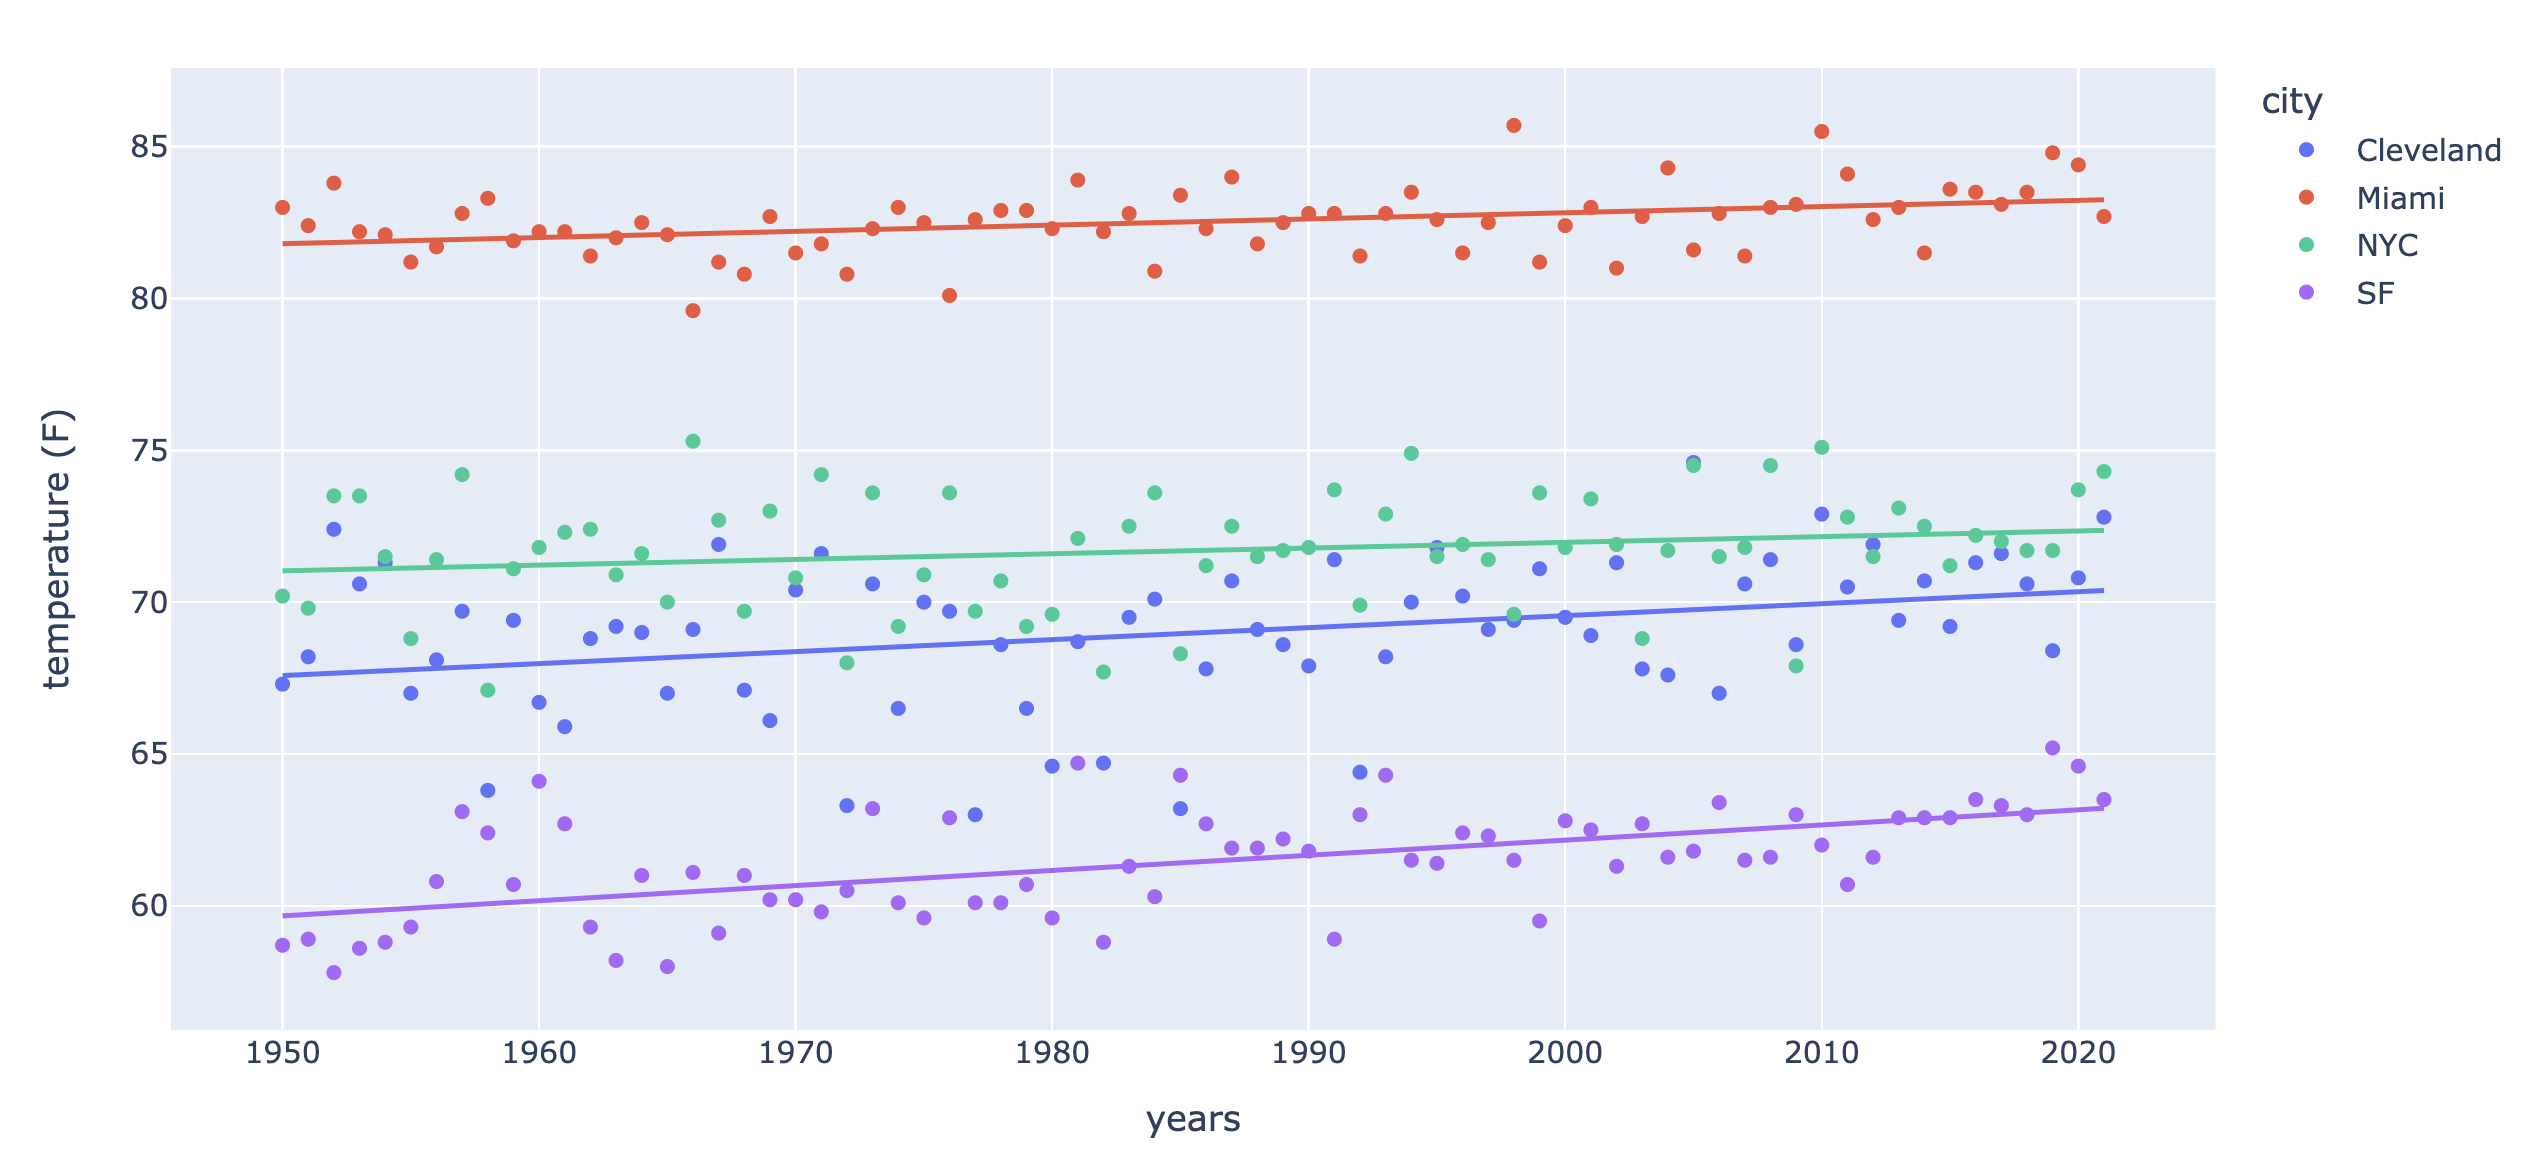

In [46]:
display_images(['ass2_ex5.png'])

## Exercise 6

We're given a function that takes *n* and returns a list *is_prime* of boolean values indicating the integers through $n$ that are prime: *is_prime[i]* is true iff *i* is prime.

In [48]:
def is_primes_upto(n):
    is_prime = np.ones((n+1,), dtype=bool)
    is_prime[:2] = False
    lim = int(np.sqrt(len(is_prime))) + 1
    for i in range(2, lim):
        is_prime[2*i::i] = False
    return is_prime

for i, v in enumerate(is_primes_upto(12)):
  print(i, v)

0 False
1 False
2 True
3 True
4 False
5 True
6 False
7 True
8 False
9 False
10 False
11 True
12 False


In [52]:

def plot_primes(n, m, color_sequence=['blue','yellow']):
    """Plots a matrix heatmap indicating prime and composite numbers."""
    # Create the m x n array
    max_value = m * n - 1
    prime_flags = is_primes_upto(max_value)
    P = np.zeros((m, n), dtype=int)

    for i in range(n):
        for j in range(m):
            p = m * i + j
            P[i][j] = 1 if prime_flags[p] else 0

    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=P,
        colorscale=color_sequence,
        showscale=False
    ))

        # Update layout for better visualization
    fig.update_layout(
        xaxis=dict(tickmode='array', tickvals=list(range(n)), showticklabels=False),
        yaxis=dict(tickmode='array', tickvals=list(range(m)), autorange='reversed',showticklabels=False),
        width=800,
        height=1000
    )
    fig.show()




plot_primes(10, 10)
plot_primes(20, 20, color_sequence=px.colors.qualitative.Dark24)


Define a function `plot_primes(m, n)` that plots a matrix heatmap of an $m\times n$ array $P$ where entry $P[i][j]$ has one color if the integer $p = n*i+j$ is prime, a different color if $p$ is composite. Two examples:

    plot_primes(10, 10)
    plot_primes(20, 20, color_sequence=px.colors.qualitative.Dark24)

In the first example, yellow indicates prime and blue composite. In the first row, yellow squares correspond to the primes 2, 3, 5, and 7; in the second row, to the primes 11, 13, 17, and 19.

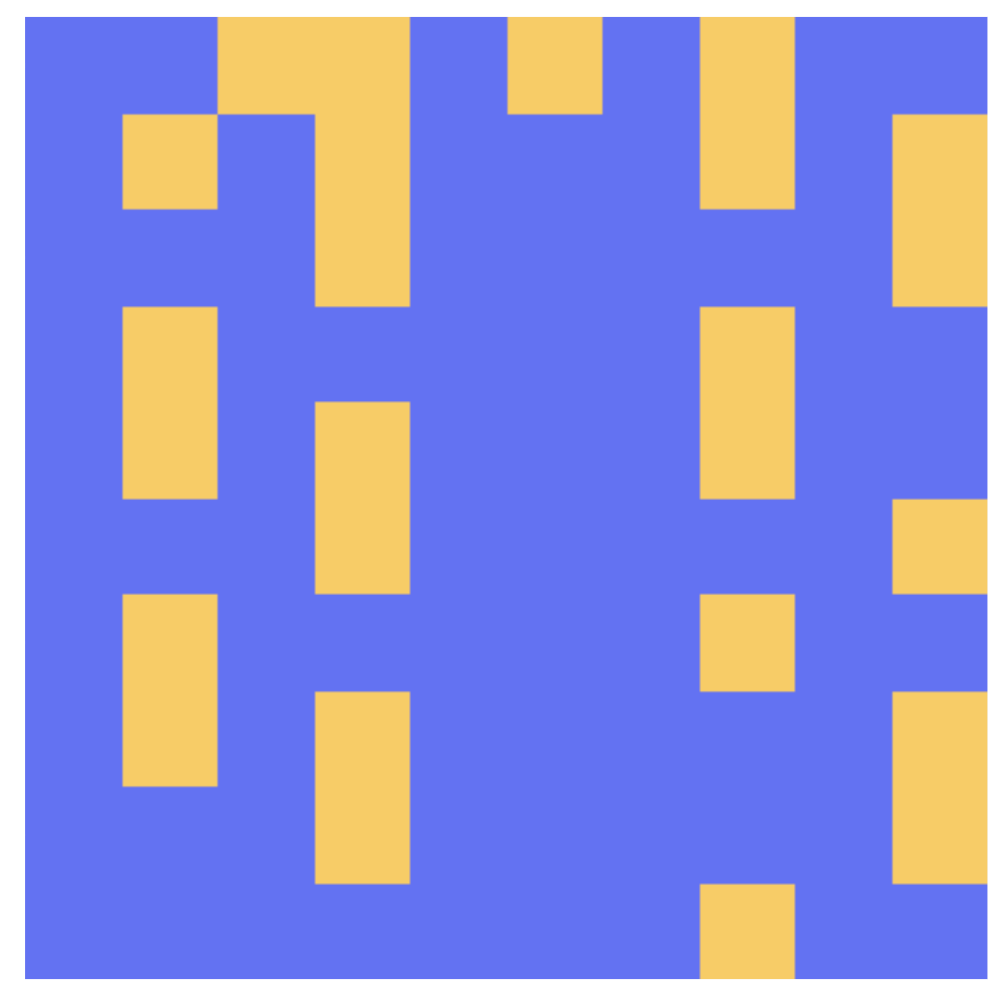

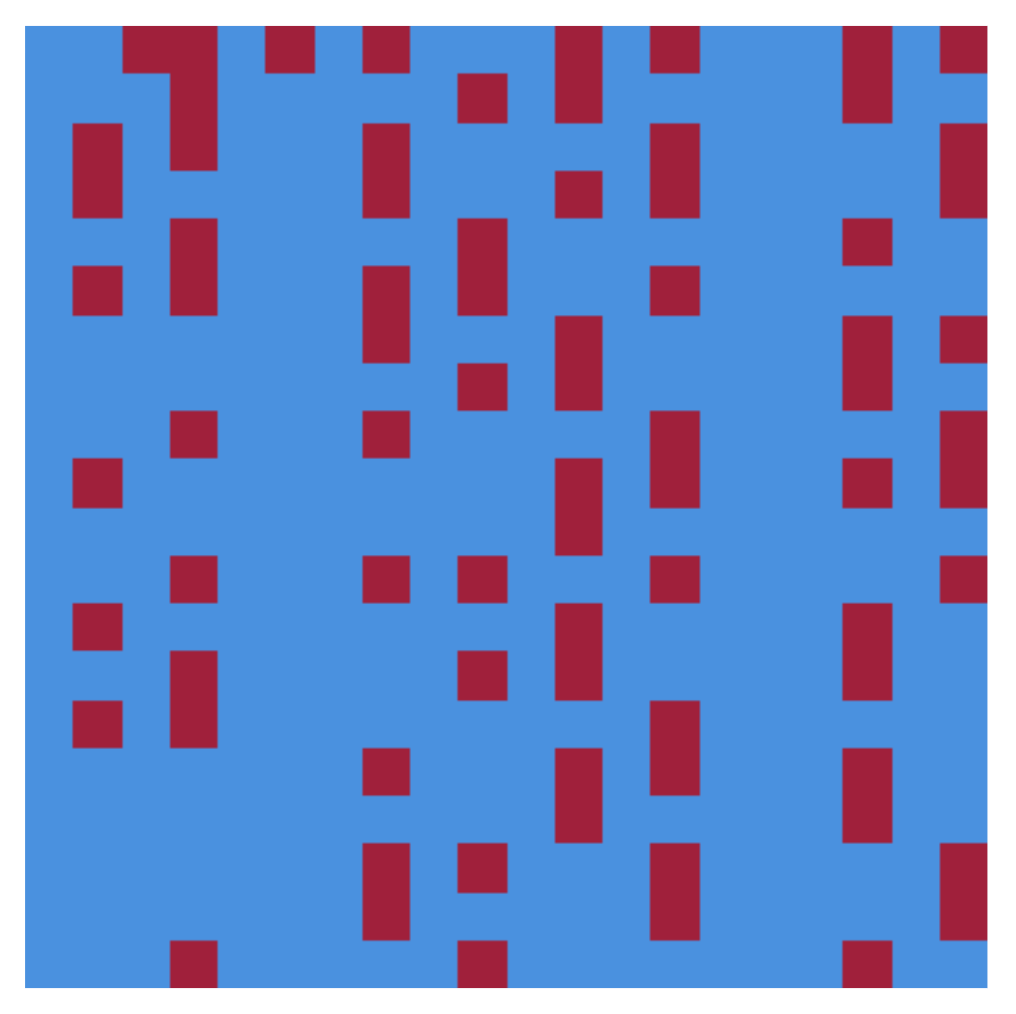

In [ ]:
display_images(['ass2_ex6a.png', 'ass2_ex6b.png'])